<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regualrization and Data Augmentation for CNNs

## Overfitting in CNNs and Methods to Prevent It

* **What is Overfitting?**
    * Occurs when a model performs well on the training data but fails to generalize to unseen data.
    * In **CNNs**, overfitting is common due to the **large number of parameters** in deep networks.
    * **Methods to Prevent Overfitting**
    * **Dropout**
        * Randomly sets a fraction of neurons to zero during training.
        * Prevents co-adaptation of neurons.
        * Controlled by a dropout rate (e.g., 0.5).
    * **Batch Normalization**
        * Normalizes the input of each layer to stabilize training.
        * Reduces **internal covariate shift** and allows higher learning rates.
    * **Data Augmentation**
        * Increases dataset size artificially by applying transformations to images.
        * Examples: rotation, flipping, scaling, cropping, brightness adjustment.
        

## Introduction to Data Augmentation Techniques

* **Common Techniques**
    * **Rotation**
        * Rotates the image by a specified angle range (EX: -30 degrees to 30 degrees)
    * **Flipping**
        * Horizontally or vertically flips the image
    * **Scaling**
        * Resizes the image by zooming in or out
    * **Cropping**
        * Extracts random portions of the image


## Implementing Regularization and Data Augmentation in CNN Training

* **Why Use Both?**
    * **Regularization** reduces the complexity of the model.
    * **Data augmentation** increases the diversity of the training data, improving generalization.




**Objective**
- Apply Dropout, Batch Normalization and data augmentation to improve CNN perfomance

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 230s 288ms/step - accuracy: 0.3410 - loss: 2.1407 - val_accuracy: 0.5089 - val_loss: 1.4084
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 2:46 214ms/step - accuracy: 0.5781 - loss: 1.2755

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5781 - loss: 1.2755 - val_accuracy: 0.5159 - val_loss: 1.3902
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 250s 285ms/step - accuracy: 0.5264 - loss: 1.3240 - val_accuracy: 0.5340 - val_loss: 1.4108
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5781 - loss: 1.1921 - val_accuracy: 0.5320 - val_loss: 1.4314
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 221s 283ms/step - accuracy: 0.6031 - loss: 1.1240 - val_accuracy: 0.6333 - val_loss: 1.0866
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7188 - loss: 0.7923 - val_accuracy: 0.6359 - val_loss: 1.0820
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 223s 286ms/step - accuracy: 0.6444 - loss: 1.0058 - val_accuracy: 0.6504 - val_loss: 1.0637
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6562 - loss: 0.9032 - val_accuracy: 0.6499 - val_loss: 1.0732
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 252s 284ms/step - accuracy: 0.6706 - loss: 0.9465 - val_ac

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7188 - loss: 0.7295 - val_accuracy: 0.7002 - val_loss: 0.9030
313/313 - 9s - 29ms/step - accuracy: 0.7002 - loss: 0.9030
Test accuracy: 0.70


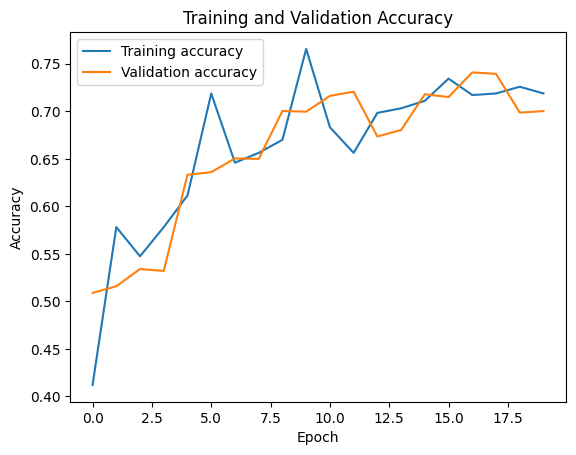

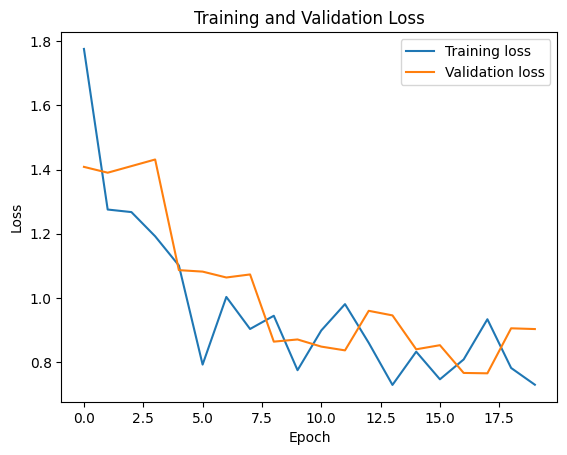

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
# Convert to float32 and divide by 255.0 (max pixel value)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
# This is necessary for categorical classification with the softmax activation and 'categorical_crossentropy' loss
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Fit the generator to training data
datagen.fit(x_train)

def create_model():
  model = models.Sequential()

  # Convolutional layer 1
  model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))

  # Convolutional layer 2
  model.add(layers.Conv2D(64, (3, 3), activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))

  # Flatten and Dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation="softmax"))

  return model

model = create_model()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model using the augmented data generator
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // 64
)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()